# Analysis of Housework

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline
import atus_tools
import john_list

In [112]:
summary = pd.read_csv("../atusdata/atussum_2013/atussum_2013.dat")       # Activity Summary

Variables needed for this task
- Gender (TESEX)
- Household work (t02.....)

In [114]:
def activity_columns2(data, activity_code):
    """For the activity code given, return all columns that fall under that activity."""
    col_prefix = "t{}".format(activity_code)
    return [column for column in data.columns if re.match(col_prefix, column) and len(column)==5]

def cat_descriptions2(df, activity_code):
    codes = activity_columns2(df, activity_code)
    out_list = []
    for i in range(len(john_list.atus_codes_list)):
        c, d = john_list.atus_codes_list[i]
        if c in codes:
            out_list.append(d)
    return out_list

In [6]:
def merge_2nd_level(df_in):
    '''Merge all columns in dataframe that share the same 2nd level category'''
    df = df_in
    def get_ints(st):
        i = int(st[1:3])
        j = int(st[3:5])
        k = int(st[5:7])
        return i, j, k
    def create_str(i, j, k):
        ret = "t"
        ret += str(i).rjust(2)
        ret += str(j).rjust(2)
        if k != 0:
            ret += str(k).rjust(2)
        ret = ret.replace(" ", "0")
        return ret
    col_save = df.columns
    gen = (col for col in col_save if col[1:].isdigit())
    for col in gen:
        i, j, k = get_ints(col)
        str_2nd = create_str(i, j, 0)
        if str_2nd in df.columns:
            df[str_2nd] += df[col]
        else:
            df[str_2nd] = df[col]
        df.drop(col, 1, inplace=True)
    return df

In [116]:
s2 = merge_2nd_level(summary)

In [117]:
s2.head()

,tucaseid,TUFINLWGT,TRYHHCHILD,TEAGE,TESEX,PEEDUCA,PTDTRACE,PEHSPNON,GTMETSTA,TELFS,...,t1810,t1811,t1812,t1813,t1814,t1815,t1816,t1818,t1899,t5001
0,20130101130004,11899905.662034,12,22,2,40,8,2,1,5,...,0,0,0,0,0,0,0,0,0,0
1,20130101130112,4447638.009513,1,39,1,43,1,2,1,1,...,0,0,0,0,0,0,0,0,0,0
2,20130101130123,10377056.507734,-1,47,2,40,1,2,1,4,...,0,0,0,0,0,25,0,0,0,0
3,20130101130611,7731257.992805,-1,50,2,40,1,1,1,1,...,0,0,30,0,0,0,0,0,0,0
4,20130101130616,4725269.227067,-1,45,2,40,2,2,1,1,...,0,0,0,0,0,0,0,0,0,0


In [124]:
s2.columns[-110:]

Index(['TESPEMPNOT', 'TRERNWA', 'TRCHILDNUM', 'TRSPFTPT', 'TEHRUSLT',
       'TUDIARYDAY', 'TRHOLIDAY', 'TRTEC', 'TRTHH', 't0101', 
       ...
       't1810', 't1811', 't1812', 't1813', 't1814', 't1815', 't1816', 't1818',
       't1899', 't5001'],
      dtype='object', length=110)

In [126]:
atus_tools.activity_columns(s2, "02")

['t0201',
 't0202',
 't0203',
 't0204',
 't0205',
 't0206',
 't0207',
 't0208',
 't0209',
 't0299']

In [129]:
men   = summary[s2.TESEX == 1] # men / women
women = summary[s2.TESEX == 2]

In [130]:
women_hours = women[atus_tools.activity_columns(s2, "02")].mean() / 60 * 7
men_hours   = men[atus_tools.activity_columns(s2, "02")].mean() / 60 * 7
print_cols  = atus_tools.cat_descriptions(s2, "02")
for i in range(len(print_cols)):
    print_cols[i] = print_cols[i][:20]
women_hours.index = print_cols
men_hours.index   = print_cols

In [131]:
mixed = pd.DataFrame(columns=print_cols)
mixed.loc[0] = men_hours
mixed.loc[1] = women_hours
mixed.index = ["men", "women"]

In [132]:
mixed

,Housework,"Food & Drink Prep.,",Interior Maintenance,Exterior Maintenance,"Lawn, Garden, and Ho",Animals and Pets,Vehicles,"Appliances, Tools, a",Household Management,Household Activities
men,2.261065,2.622039,0.579982,0.648783,1.916873,0.641873,0.604339,0.244927,1.059045,0.010216
women,6.528410,5.716685,0.312851,0.197721,0.919470,0.764710,0.050883,0.046644,1.551372,0.003702


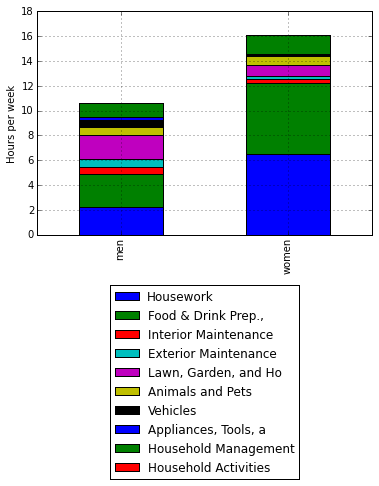

In [143]:
mixed.plot(kind="bar", stacked=True)
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.2))
plt.ylabel("Hours per week")
plt.show()

By grouping the housework activities into the 2nd tier categories, we can get a better picture of how the gender difference in contributions breaks down. We see that women perform a vastly larger share of household work overall. The work that women do is also much more homogenous by the BLS categories - with food and housework making up the vast majority. Men, on the other hand, only contribute to food and housework sparingly while engaging in much more lawn work, exterior work, interior maintenance, animal care, and several others.

In [2]:
summary = pd.read_csv("../atusdata/atussum_2013/atussum_2013.dat")       # Start over for new analysis

In [3]:
child = []
for i in range(5):
    new_df = summary[summary.TRCHILDNUM == i]  # pick out rows that have "i" number of children
    new_df = new_df[atus_tools.activity_columns(summary, "02")].mean() / 60 * 7 # cut down included columns, do math
    child.append(new_df)

In [4]:
#child_list = pd.DataFrame(columns=print_cols)
use_cols = atus_tools.activity_columns(summary, "02")
child_list = pd.DataFrame(columns=use_cols)
for i in range(5):
    child_list.loc[i] = child[i]
child_list.index = [str(i)+" children" for i in range(5)]

In [7]:
child_list = atus_tools.merge_2nd_level(child_list)

In [8]:
print_cols  = atus_tools.cat_descriptions(child_list, "02")
for i in range(len(print_cols)):
    print_cols[i] = print_cols[i][:20]

In [9]:
print_cols

['Housework',
 'Food & Drink Prep., ',
 'Interior Maintenance',
 'Exterior Maintenance',
 'Lawn, Garden, and Ho',
 'Animals and Pets',
 'Vehicles',
 'Appliances, Tools, a',
 'Household Management',
 'Household Activities']

In [10]:
child_list.columns = print_cols

In [11]:
child_list.head()

,Housework,"Food & Drink Prep.,",Interior Maintenance,Exterior Maintenance,"Lawn, Garden, and Ho",Animals and Pets,Vehicles,"Appliances, Tools, a",Household Management,Household Activities
0 children,4.308494,3.919575,0.475307,0.446361,1.668418,0.906457,0.335653,0.149897,1.573299,0.000090
1 children,4.636852,4.304098,0.213776,0.267713,1.014436,0.537343,0.276111,0.113849,0.879734,0.030998
2 children,4.904581,5.079362,0.452609,0.399516,0.908167,0.459575,0.205908,0.134427,1.133531,0.005648
3 children,5.989687,5.437830,0.609848,0.313221,1.144599,0.275758,0.276784,0.092033,1.110728,0.000000
4 children,6.904074,5.808963,0.555852,0.497778,0.596296,0.210000,0.305926,0.068444,0.942148,0.000000


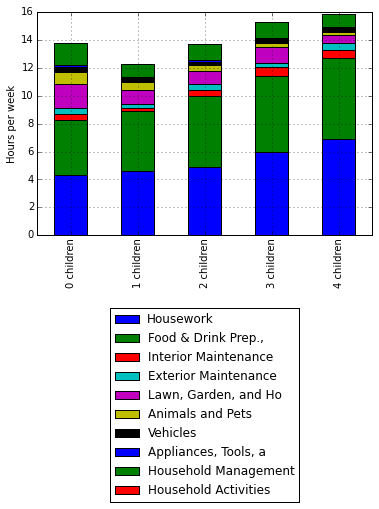

In [12]:
child_list.plot(kind="bar", stacked=True)
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.3))
plt.ylabel("Hours per week")
plt.show()

What drives the amount of time spend on housework? Could it be the kids? Common sense might suggest "yes". Driving into the data, however, it seems that having no children correlates with doing more housework than having just 1 child. This seems like a strange result, but if we consider that child care is classified in its own category, perhaps it is not highly surprising. Unsurprisingly, the amount of housework increases with a larger family.

The nature of the work done also shows a pronounced trend. Childless people spend a strangely large amount of time on Lawn care. More children seems to correlate with more housework and food prep, which seem to be singled out in this analysis as the bread and butter of keeping a home together.